# G. Permutations

In [1]:
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils.matplotlib_init

In [2]:
df = pd.read_csv('input/g.in', skiprows=1, sep=' ', header=None)

In [3]:
def stupid_perm():  
    partial_sums = [0,1,8,35,111,285,  
        628,1230,2191,3606,5546,8039,11056,14506,18242,  
        22078,25814,29264,32281,34774,36714,38129,39090,  
        39692,40035,40209,40285,40312,40319,40320]  
    r = random.randint(0, partial_sums[-1])  
    num_inv = 0  
    while partial_sums[num_inv] < r:  
        num_inv += 1  
    perm = list(range(8))  
    for step in range(num_inv):  
        t1 = random.randint(0, 7)  
        t2 = random.randint(0, 7)  
        perm[t1], perm[t2] = perm[t2], perm[t1]  
    return perm

def random_perm():  
    perm = list(range(8))  
    random.shuffle(perm)  
    return perm 

As it is said in the task description, stupid permutation function has a bug. As a result not all permutaitions
occur evenly - some may occur more often while others less often. Let's generate 100000 stupid permutations and
calculate how often each of numbers (0-7) was placed on each position (0-7).

Some pandas magic:

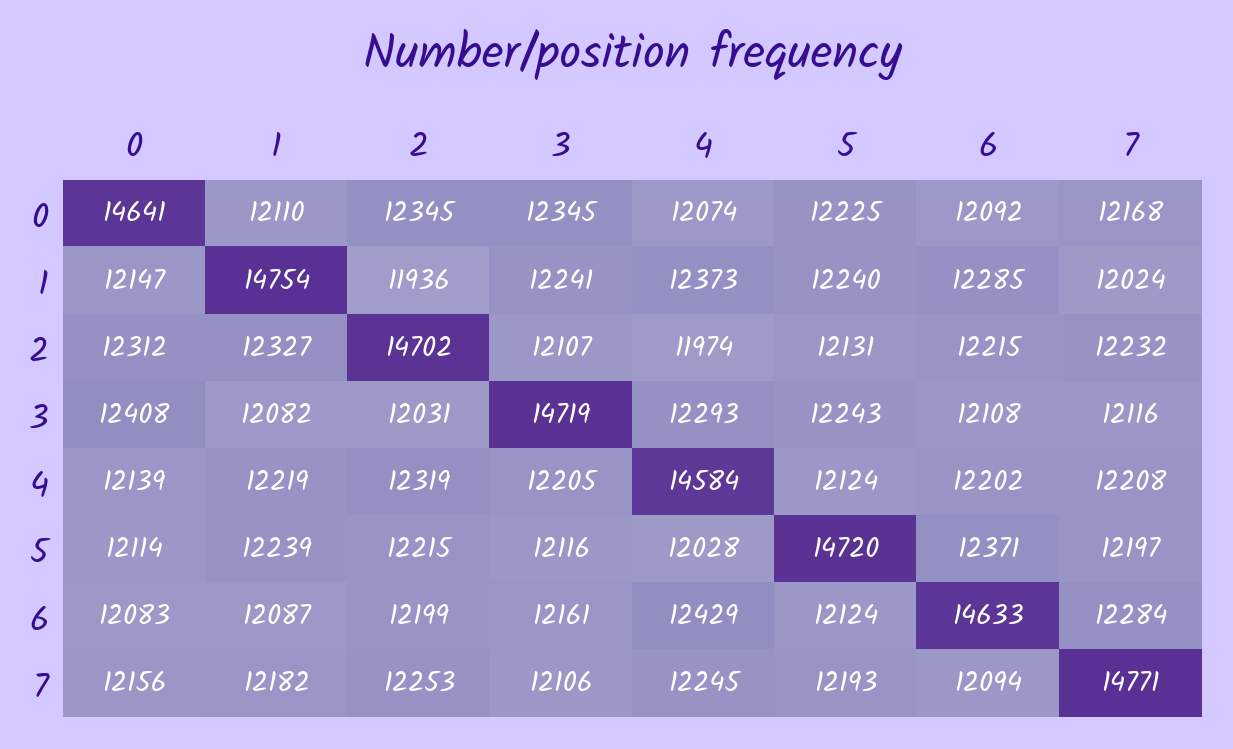

In [69]:
counts = pd.get_dummies(pd.DataFrame([stupid_perm() for i in range(100000)]).stack().astype(object)) \
    .groupby(level=1) \
    .sum() \
    .astype(int)
ax = sns.heatmap(counts, cmap='Purples', annot=True, fmt='d', cbar=False, 
                 vmin=8000, vmax=16000, annot_kws={'size': 14})
ax.set_title('Number/position frequency', y=1.15)
ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.yticks(rotation=0)
ax.figure.tight_layout(pad=1.5)

Columns in matrix represent numbers, while rows - positions. Thus the number in each cell means how many times
each number was on each position.

From the matrix we see, that the bug in stupid permutation causes some numbers to stay on initial position
more often, than it should be if all permutations were evenly distributed. E.g. 0 stays on position 0, 1 on 1, 2 on 2 etc.

Let's check the same for random permutations to see the difference:

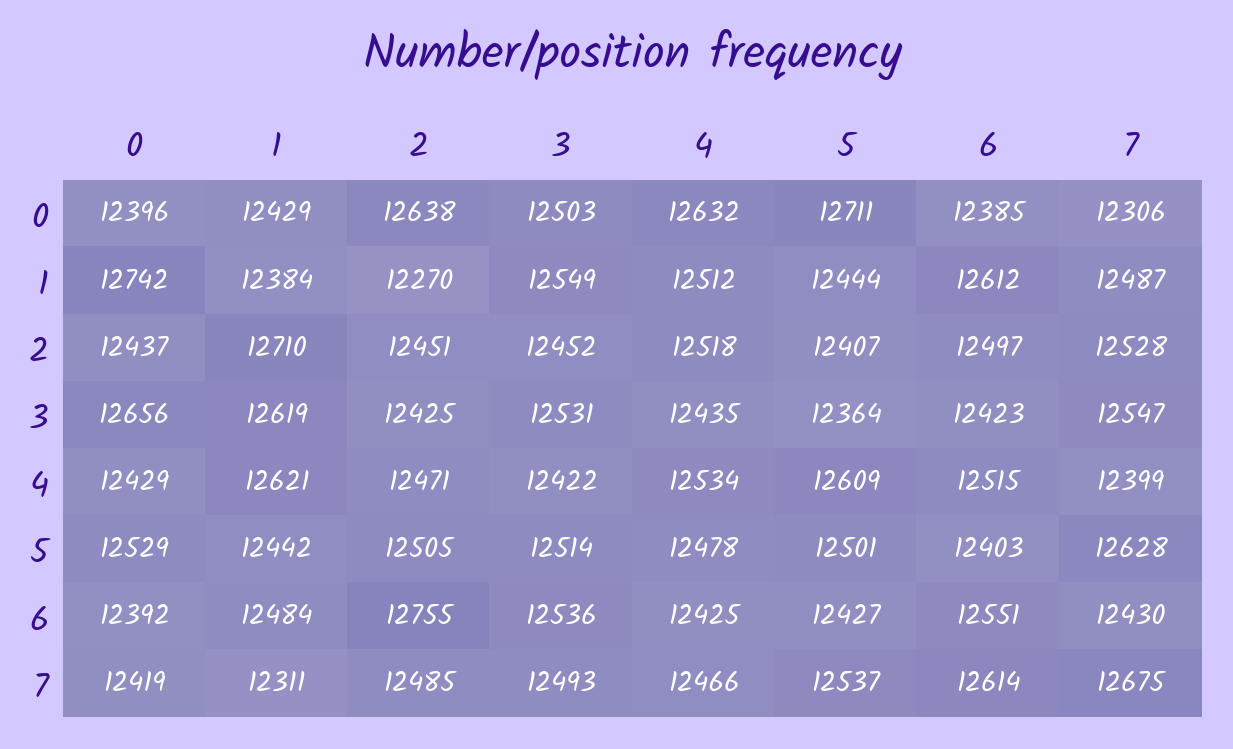

In [70]:
counts = pd.get_dummies(pd.DataFrame([random_perm() for i in range(100000)]).stack().astype(object)) \
    .groupby(level=1) \
    .sum() \
    .astype(int)
ax = sns.heatmap(counts, cmap='Purples', annot=True, fmt='d', cbar=False,
                 vmin=8000, vmax=16000, annot_kws={'size': 14})
ax.set_title('Number/position frequency', y=1.15)
ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.yticks(rotation=0)
ax.figure.tight_layout(pad=1.5)

Okay, for random permutations, as expected, all frequencies are distrubuted uniformly.

Thus, in order to solve the task we should look for specific permutations that occur more often in stupid permutation case. Namely permutations, that have 0 on position 0, 1 on 1, etc. These permutations may occur in random permutation
as well, but less often. Then for each group of 1000 permutations we calculate number of such specific permutations
and sort them by that number in ascending order. Thus, random permutations will go first and stupid ones later.

In [135]:
suspecious_permutations = (df[0] == 0) | (df[1] == 1) | (df[2] == 2) | (df[3] == 3) \
                        | (df[4] == 4) | (df[5] == 5) | (df[6] == 6) | (df[7] == 7)

Use pandas `rolling` method to aggragate over window of 1000 sequential rows.

In [140]:
suspecious_permutations_count = suspecious_permutations.rolling(window=1000) \
    .sum()[999::1000] \
    .astype(int) \
    .to_frame() \
    .reset_index(drop=True) \
    .sort_values(0) \
    .rename({0: 'count'}, axis=1)

suspecious_permutations_count.head(10)

,count
66,600
106,604
119,605
91,606
199,608
184,608
164,608
186,610
74,611
31,611


Save the answer

In [142]:
np.savetxt('output/g.out', suspecious_permutations_count.index.values, '%d')